In [101]:
from __future__ import annotations
import zipfile
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt
import tempfile
import plotly.express as px

In [102]:
import sys
sys.path.append('/Users/alex/Desktop/CS/Internships/DBF/python_tools/')
from util.blackbox import decode_blackbox

In [103]:
DATA_ZIP = "/Users/alex/Desktop/CS/Internships/DBF/python_tools/data/thrustStand/1_26_2024/Blackbox.zip"
OUTPUT_DIR = "/Users/alex/Desktop/CS/Internships/DBF/python_tools/data/thrustStand/1_26_2024/"

In [104]:
MIN_THROTTLE = 1000
MAX_THROTTLE = 1850

In [105]:
df_overall = pd.DataFrame(columns=["Motor", "Prop", "Battery", "RPM"])
dfs = {}

with zipfile.ZipFile(DATA_ZIP) as z:
    for name in filter(lambda x: x.endswith(".TXT") and not x.startswith('__MACOSX'), z.namelist()):
        print(name)
        motor, _, battery, prop = name.removeprefix("Blackbox/").removesuffix(".TXT").split("_")
        with tempfile.TemporaryDirectory() as tmpdirname:
            z.extract(name, tmpdirname)
            df = decode_blackbox(tmpdirname + "/" + name)
        df.dropna(inplace=True, subset=['motor[0]'])
        df.rename(columns={"motor[0]": "Throttle"}, inplace=True)
        df.rename(columns={"escRPM": "RPM"}, inplace=True)

        max_rpm = df["RPM"].max()
        df_overall.loc[-1] = [motor, prop.lower(), battery, max_rpm]
        df_overall.index = df_overall.index + 1

        dfs[name] = df[["RPM", "Throttle"]]
        dfs[name]['Throttle Percent'] = df['Throttle'].apply(lambda x: (x - MIN_THROTTLE) / (MAX_THROTTLE - MIN_THROTTLE) * 100)
        dfs[name]['Motor'] = motor
        dfs[name]['Prop'] = prop
        dfs[name]['Battery'] = battery

Blackbox/AT7215_battcomp_1600_15x14x3.TXT



Log 1 of 1, start 00:37.630, end 01:30.863, duration 00:53.233

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames    1613  106.6 bytes avg   172011 bytes total
P frames   23848   72.5 bytes avg  1727839 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     326   41.8 bytes avg    13627 bytes total
Frames     25461   74.6 bytes avg  1899850 bytes total
Data rate  478Hz  36606 bytes/s     366100 baud

49 frames failed to decode, rendering 457 loop iterations unreadable. 1106 iterations are missing in total (1108ms, 2.08%)
26566 loop iterations weren't logged because of your blackbox_rate settings (26615ms, 50.00%)

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_4765/4206124599.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1088   37630306  2041-06-28T01:04:37.630306Z            0   
1           1120   37662376  2041-06-28T01:04:37.662376Z            0   
2           1122   37664380  2041-06-28T01:04:37.664380Z            0   
3           1124   37666391  2041-06-28T01:04:37.666391Z            0   
4           1126   37668389  2041-06-28T01:04:37.668389Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:50.297, end 02:04.837, duration 01:14.540

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames    2281  107.1 bytes avg   244242 bytes total
P frames   33850   72.4 bytes avg  2452362 bytes total
E frames       2    7.5 bytes avg       15 bytes total
S frames     529   41.3 bytes avg    21848 bytes total
Frames     36131   74.6 bytes avg  2696604 bytes total
Data rate  484Hz  36923 bytes/s     369300 baud

53 frames failed to decode, rendering 437 loop iterations unreadable. 1069 iterations are missing in total (1071ms, 1.44%)
37199 loop iterations weren't logged because of your blackbox_rate settings (37269ms, 50.00%)

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_4765/4206124599.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

   loopIteration  time (us)                     dateTime  axisRate[0]  \
0          34656   50297059  2041-06-28T01:04:50.297059Z            0   
1          34688   50329119  2041-06-28T01:04:50.329119Z            0   
2          34690   50331124  2041-06-28T01:04:50.331124Z            0   
3          34692   50333133  2041-06-28T01:04:50.333133Z            0   
4          34694   50335133  2041-06-28T01:04:50.335133Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:39.694, end 00:53.074, duration 00:13.379

Statistics
Looptime           1001 avg            2.0 std dev (0.2%)
I frames     418  105.7 bytes avg    44184 bytes total
P frames    6245   72.6 bytes avg   453434 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     246   41.9 bytes avg    10299 bytes total
Frames      6663   74.7 bytes avg   497618 bytes total
Data rate  498Hz  38323 bytes/s     383300 baud

3 frames failed to decode, rendering 15 loop iterations unreadable. 15 iterations are missing in total (15ms, 0.11%)
6677 loop iterations weren't logged because of your blackbox_rate settings (6688ms, 50.00%)

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_4765/4206124599.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [106]:
df_overall

,Motor,Prop,Battery,RPM
2,AT7215,15x14x3,1600,9273
1,AT7215,15x14x3,2200,9273
0,AT7215,15x14x3,1300,8618


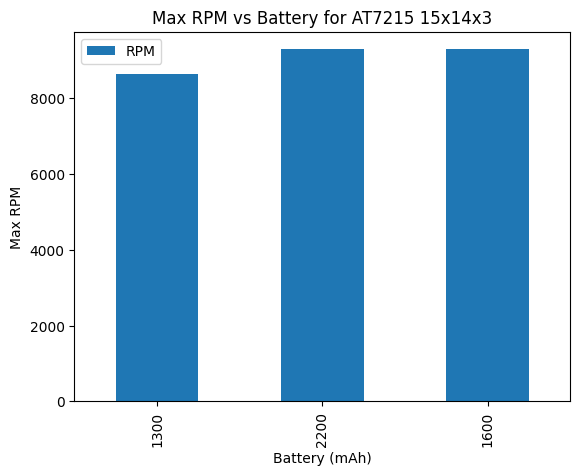

In [107]:
ax = df_overall.sort_index().plot(kind='bar', x='Battery', y='RPM')
ax.set_ylabel("Max RPM")
ax.set_xlabel("Battery (mAh)")
ax.set_title("Max RPM vs Battery for AT7215 15x14x3")
# sort x-axis

plt.show()

<Axes: xlabel='Throttle Percent', ylabel='RPM'>

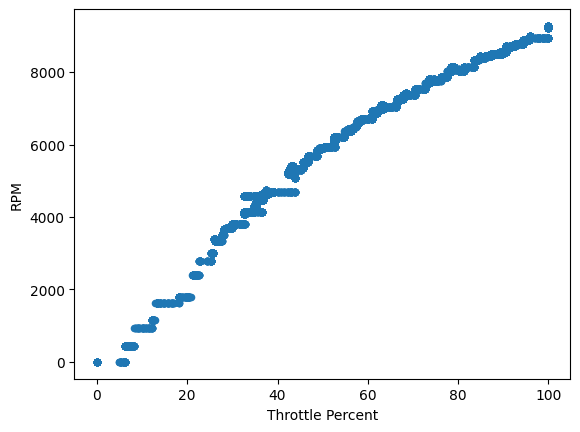

In [108]:
dfs['Blackbox/AT7215_battcomp_1600_15x14x3.TXT'].loc[:24403,:].plot(x='Throttle Percent', y='RPM', kind='scatter')

In [109]:
df = pd.DataFrame(columns=["Motor/Prop/Battery", "RPM", "Throttle Percent"])
for name, data in dfs.items():
    peak = len(data['Throttle']) - data['Throttle'].values[::-1].argmax() - 1
    data["Motor/Prop/Battery"] = data["Motor"] + "/" + data["Prop"] + "/" + data["Battery"]
    df = pd.concat([df, data[["Motor/Prop/Battery", "RPM", "Throttle Percent"]].loc[:peak, :]])

In [113]:
fig = px.scatter(df, x='Throttle Percent', y='RPM', color='Motor/Prop/Battery', title="RPM vs Throttle Percent")
fig.update_yaxes(tick0=0, dtick=1000)
fig.show()